 ## <center>Practicing Machine Learning</center>
### <center>Simple Classification Problem </center>
### <center>MNIST Handwritten characters classification </center>
#### <center> Recommended Source: <a href="https://www.amazon.com/-/es/Aur%C3%A9lien-G%C3%A9ron/dp/1492032646/ref=sr_1_fkmr1_1?__mk_es_US=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=2Y7BISU0SQYCV&keywords=hand+son+machine+learning+tensorflow+keras&qid=1664596219&qu=eyJxc2MiOiIwLjkzIiwicXNhIjoiMC4wMCIsInFzcCI6IjAuMDAifQ%3D%3D&sprefix=hand+son+machine+learning+tensorflow+keras%2Caps%2C105&sr=8-1-fkmr1">Link</a></center>

### Loading dependencies

In [84]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import f1_score

### Download dataset using Scikit-Learn

In [15]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### Data Preprocessing to be used in ML models

In [16]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [17]:
y.shape

(70000,)

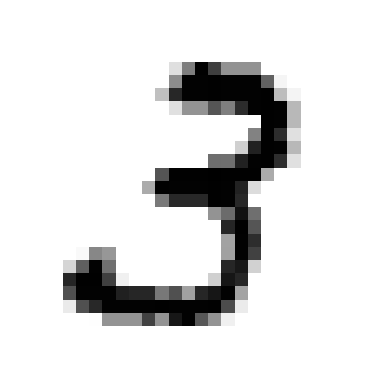

In [59]:
some_digit = X.iloc[59996].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [19]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Training a Binary Classifier
As practice I will train two binary classifiers only to find the number 3 and compare results

In [62]:
y_train_3 = y_train.cat.codes==3
y_test_3 = y_test.cat.codes==3


In [55]:
sgdc_model = SGDClassifier(random_state=42)
sgdc_model.fit(X_train, y_train_3)

SGDClassifier(random_state=42)

In [56]:
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train_3)

C:\Users\Usuario1\anaconda3\envs\Machine Learning Topics Explanation\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
sgdc_model.predict([some_digit])

C:\Users\Usuario1\anaconda3\envs\Machine Learning Topics Explanation\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [61]:
logistic_reg_model.predict([some_digit])

C:\Users\Usuario1\anaconda3\envs\Machine Learning Topics Explanation\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

Both models were able to predict if a digit is the number 3 successfully but how well do they perform?

### Evaluating Models

In [64]:
sdg_preds = sgdc_model.predict(X_test)
lr_preds = logistic_reg_model.predict(X_test)


In [72]:
sdg_confusion_matrix = confusion_matrix(y_test_3, sdg_preds)
sdg_confusion_matrix

array([[8978,   12],
       [ 453,  557]], dtype=int64)

In [73]:
lr_confusion_matrix = confusion_matrix(y_test_3, lr_preds)
lr_confusion_matrix

array([[8888,  102],
       [ 137,  873]], dtype=int64)

Confusion matrix hands a lot of information but sometimes it is important to have a concise metric on how our model works so for that we can use the precision metric derived by the following formula
$$

precision = \frac{TP}{TP+FP}
$$
and to validate the precision we use the recall metric also known as 'sensitivity' which is the ratio of positive instances that are correctly detected by the model
$$
recall = \frac{TP}{TP+FN}
$$

In [79]:
tn, fp, fn, tp = sdg_confusion_matrix.ravel()

sdg_precision = tp/(tp+fp)
sdg_precision

0.9789103690685413

In [80]:
sdg_recall = tp/(tp+fn)
sdg_recall

0.5514851485148515

In [81]:
tn, fp, fn, tp = lr_confusion_matrix.ravel()

lr_precision = tp/(tp+fp)
lr_precision

0.8953846153846153

In [82]:
lr_recall = tp/(tp+fn)
lr_recall

0.8643564356435643

It is often convenient to combine precision and recall into a single metric called "f1 score" you can find this in the Scikit_learn framework as follows

In [85]:
sdg_f1 = f1_score(y_test_3, sdg_preds)
sdg_f1

0.7055098163394553

In [86]:
lr_f1 = f1_score(y_test_3, lr_preds)
lr_f1

0.8795969773299748

### Results:
SDG classifier looked like it performed really well having great precision but after calculating the f1_score for both models the Logistic Regression provided the best score and is in fact the simplest model we tried